Import all the necessary libraries as:

In [3]:
import numpy as np
import math
import pandas as pd

Given below is the code for preparing the KNN Model. We assume that the parameters to the model are in the form of panda tables.

In [4]:
class KNN:

    def __init__(self,k=3):
        self.k = k

    def train(self,dtrain,Y,dtest):
        self.dtrain = np.array(dtrain) #This is the input training data.
        self.Y = np.array(Y) #This is the output training data.
        self.dtest = np.array(dtest) #This is the input testing data for which we return the output.

    def predict(self):
        output=[]
        for i in self.dtest:
            distances=[]
            for j,val in enumerate(self.dtrain):
                s = np.sqrt(np.sum((val-i)**2))
                distances.append((s,self.Y[j]))
            distances.sort()
            distances = distances[0:self.k]
            distances = np.transpose(np.array(distances))
            a,b = np.unique(distances[1],return_counts=True)
            b = list(b)
            output.append(a[b.index(max(b))])
        
        return output

Now we shall focus on builiding the test and train data for predicting and using the model.

In [5]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Given below is a function used for the cleaning of the data specific to this 'titanic.csv' file only. This has been done to omit cleaning of the data for the training and testing data separately.

In [6]:
def DataCleaning(data):
    #Here this data is specific to the 'titanic.csv' dataset and shall be of the form of a panda table.
    #We shall see that the PassengerId is unique for the data.

    #First step towards cleaning is to remove all the unnecessary columns this includes the 'PassengerId', the 'Name', the 'Ticket', the 'Cabin'
    #and the 'Embarked'.

    #We understand that 'PassengerId' or 'Name' or 'Ticket' do not really affect the survival level of a person. The 'Cabin' and 'Embarked' columns
    #have a lot of NaN values which might lead to a difficulty in predicting and hence are being removed.

    data = data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

    #Now change the values under data.Sex represented as strings to actual classes where 'male' refers to 0 and 'female' refers to 1.

    data.Sex = data.Sex.replace("male",0)
    data.Sex = data.Sex.replace("female",1)

    #We also see that a few entries of Age are represented as NaN and we might want to remove such entries.

    ind = [i for i,val in enumerate(data.Age) if math.isnan(val)]
    data = data.drop(ind)

    #We might want to collect the output variable as Y.

    Y=[]
    if 'Survived' in data:
        Y = data.Survived.values
        data = data.drop('Survived',axis=1)
    
    return data,Y,ind


In [7]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Perform Data Cleaning for both the datasets as:

In [8]:
df_train, Y, ind_ = DataCleaning(df_train)
df_test,y, ind_t = DataCleaning(df_test)

In [9]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,0,26.0,0,0,30.0000


In [10]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750
411,1,1,37.0,1,0,90.0000
412,3,1,28.0,0,0,7.7750
414,1,1,39.0,0,0,108.9000


Now send these data entries to prepare the model and get the final predictions.

In [11]:
Model = KNN(3)
Model.train(df_train,Y,df_test)
output = Model.predict()

print(output)

[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0,

Now we shall be looking to improving the accuracy of the model bu choosing the optimal value of k. We shall do this by comparing the output we have achieved to the true output.

In [12]:
#To get the true output list:

t_out = pd.read_csv('gender_submission.csv')

#Since we removed certain values from the test data owing to the Nan values, we shall do the same here.
index = ind_t

t_out = t_out.drop(index)

#Finally gather the output values as:
t_out = t_out.Survived.values

print(t_out)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0]


We find Accuracy by comparing the true output to the output we have obtained.

In [13]:
Acc = np.sum(t_out==output)/len(output)
Acc = Acc*100
print(Acc)

61.14457831325302


We have obtained an accuracy of 61.14%. Now let's look at improving this number by toggling our value of k.

In [15]:
k = [i for i in range(3,29,2)]
Acc = []

for i in k:
    Model = KNN(i)
    Model.train(df_train,Y,df_test)
    output = Model.predict()
    s = np.sum(output==t_out)/len(output)
    s = s*100
    Acc.append(s)

print(Acc)

[61.14457831325302, 62.65060240963856, 63.85542168674698, 63.55421686746988, 61.74698795180723, 57.53012048192772, 58.734939759036145, 60.54216867469879, 61.44578313253012, 62.65060240963856, 62.048192771084345, 62.34939759036144, 62.048192771084345]


In [16]:
import matplotlib.pyplot as plt

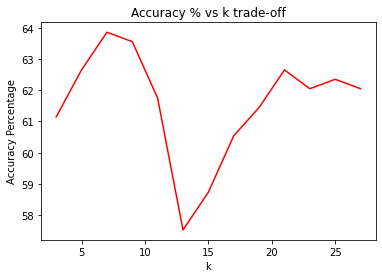

In [20]:
plt.figure()
plt.plot(k,Acc,'r-')
plt.xlabel('k')
plt.ylabel('Accuracy Percentage')
plt.title('Accuracy % vs k trade-off')
plt.show()

We see that peak performance is achieved at k = 7 with an accuracy percentage of 63.85%. Now with this value of k fixed, we shall draw up the confusion matrix using the seaborn package.

In [18]:
Model = KNN(7)
Model.train(df_train,Y,df_test)
_out = Model.predict()

print(_out)
print(t_out)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0,

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

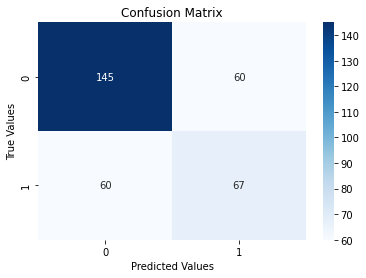

In [21]:
C_M = confusion_matrix(t_out,_out) #Creates the Confusion Matrix
sns.heatmap(C_M,annot=True,cmap='Blues',fmt='d') #HeatMap

plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()